In [ ]:
import numpy as np 
import cv2
from os import listdir
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
yes=listdir('/content/drive/MyDrive/train/MildDemented')
no=listdir('/content/drive/MyDrive/train/NonDemented')


X =[]
for file in yes:
    img = cv2.imread('/content/drive/MyDrive/train/MildDemented/'+file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    img = cv2.medianBlur(img, 5) 
    img = cv2.resize(img, (64, 64) ) 
    img = cv2.Canny(img, 255, 255, 3, L2gradient=True)
    img = img.astype('uint8')
    X.append(img)
    
for file in no:
    img = cv2.imread('/content/drive/MyDrive/train/NonDemented/'+file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(img, 5)
    img = cv2.resize(img, (64, 64) )
    img = cv2.Canny(img, 255, 255, 3, L2gradient=True)
    img = img.astype('uint8')
    X.append(img)
    
X = np.squeeze(X)


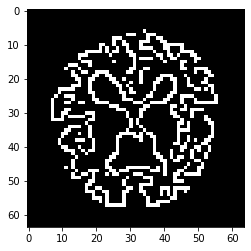

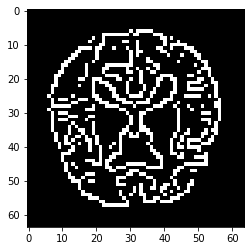

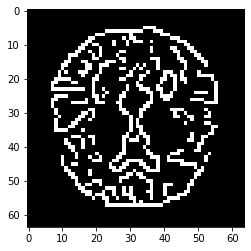

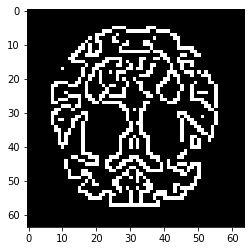

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X[1200], cmap='gray')
plt.show()
plt.imshow(X[700], cmap='gray')
plt.show()
plt.imshow(X[2900], cmap='gray')
plt.show()
plt.imshow(X[2700], cmap='gray')
plt.show()
plt.figure()

In [ ]:
y1=np.full(len(yes),1)
y0=np.full(len(no),0)
Y=np.concatenate([y1,y0])

from keras.utils.np_utils import to_categorical
Y = to_categorical(Y, num_classes = 2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10,random_state=42)


In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=9, padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
#model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
 

model.add(tf.keras.layers.Dense(2, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       10496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        663616    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history=model.fit(X_train,
         y_train,
         batch_size=16,
         epochs=23,
         validation_data=(X_test, y_test))
model.save('cnn_sav.h5')

Epoch 1/23
225/225 [==============================] - 7s 18ms/step - loss: 0.9912 - acc: 0.5522 - val_loss: 0.6207 - val_acc: 0.5875
Epoch 2/23
225/225 [==============================] - 3s 16ms/step - loss: 0.5307 - acc: 0.7115 - val_loss: 0.4545 - val_acc: 0.8075
Epoch 3/23
225/225 [==============================] - 3s 16ms/step - loss: 0.4631 - acc: 0.7828 - val_loss: 0.4162 - val_acc: 0.8175
Epoch 4/23
225/225 [==============================] - 4s 16ms/step - loss: 0.4139 - acc: 0.8125 - val_loss: 0.3738 - val_acc: 0.8400
Epoch 5/23
225/225 [==============================] - 4s 16ms/step - loss: 0.4043 - acc: 0.8261 - val_loss: 0.3804 - val_acc: 0.8325
Epoch 6/23
225/225 [==============================] - 4s 16ms/step - loss: 0.3764 - acc: 0.8323 - val_loss: 0.3873 - val_acc: 0.8325
Epoch 7/23
225/225 [==============================] - 4s 16ms/step - loss: 0.3414 - acc: 0.8403 - val_loss: 0.3504 - val_acc: 0.8325
Epoch 8/23
225/225 [==============================] - 4s 16ms/step - 

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

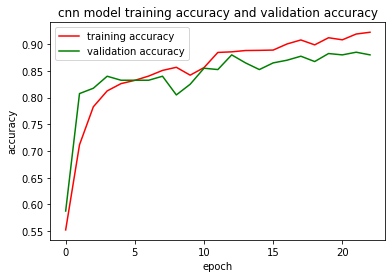

In [ ]:
plt.plot(acc, color = 'red', label = 'training accuracy')
plt.plot(val_acc, color = 'green', label = 'validation accuracy')
plt.title('cnn model training accuracy and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

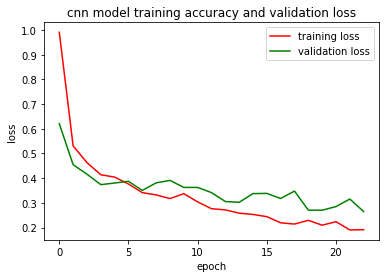

In [ ]:
plt.plot(loss, color = 'red', label = 'training loss')
plt.plot(val_loss, color = 'green', label = 'validation loss')
plt.title('cnn model training accuracy and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=2)
print('\n', 'Test accuracy:', score[1])

y_predict = model.predict(X_test)
yr=np.around(y_predict)


13/13 - 0s - loss: 0.2648 - acc: 0.8800 - 142ms/epoch - 11ms/step

 Test accuracy: 0.8799999952316284


              precision    recall  f1-score   support

           0       0.88      0.87      0.87       194
           1       0.88      0.89      0.88       206

   micro avg       0.88      0.88      0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400
 samples avg       0.88      0.88      0.88       400



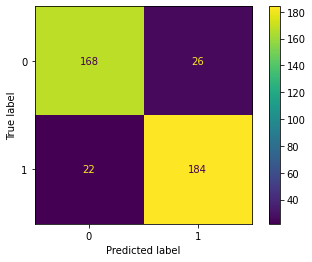

In [ ]:
y_test

ypred1d = []

for i in yr:
    if i[0] > i[1]:
        ypred1d.append(0)
    else:
        ypred1d.append(1) 

ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report
print(classification_report(y_test,yr))
cm = confusion_matrix(ytest1d, ypred1d)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from tensorflow.keras.models import Model,load_model
model = load_model('cnn_sav.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       10496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        663616    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

(3595, 256)
(400, 256)
0.8825
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       194
           1       0.89      0.88      0.89       206

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


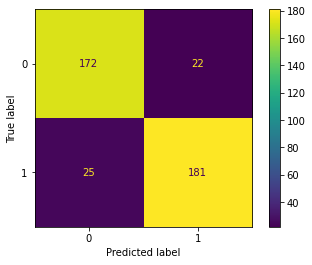

In [ ]:
dense_l = Model(inputs=model.input,outputs=model.get_layer('flatten').output)

densefeatures_train = dense_l.predict(X_train)
print(densefeatures_train.shape)

densefeatures_test = dense_l.predict(X_test)
print(densefeatures_test.shape)

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(reg.score(densefeatures_test,np.argmax(y_test,axis=1)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = reg.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))

cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

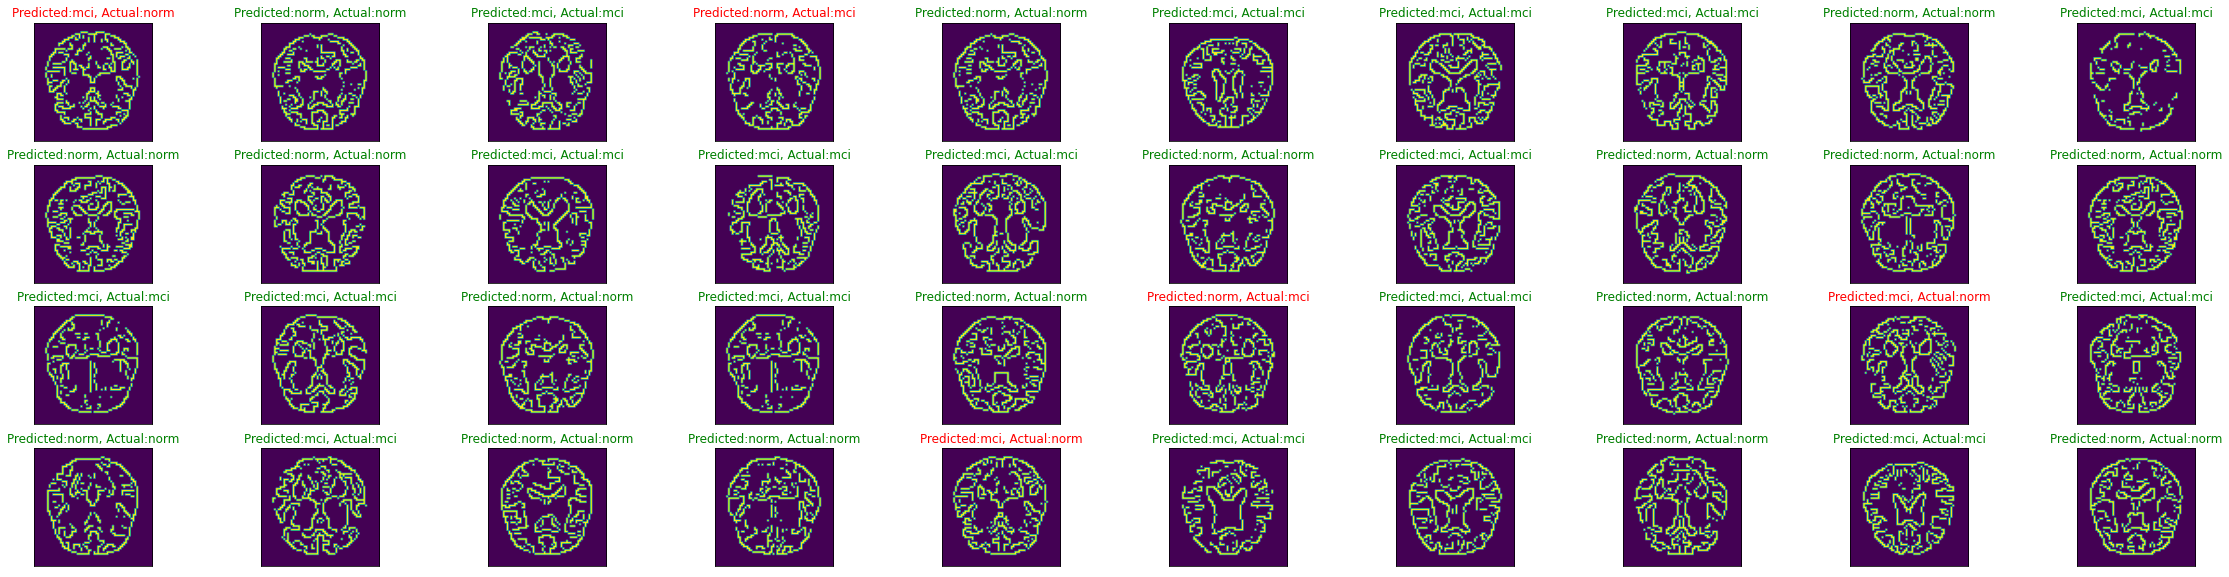

In [ ]:
from numpy.random import seed
from numpy.random import randint
from tensorflow.keras.models import Model,load_model
arr=[]


for z in range(len(yr)):
    arr.append(int(yr[z]))

labels =["norm",  # index 0
        "mci",      # index 1
        ]

figure = plt.figure(figsize=(40, 10))
values = randint(1, 161, 40)
for i in range(40):
    ax = figure.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[values[i]]))   
    # Set the title for each image
    ax.set_title("Predicted:{}, Actual:{}".format(labels[arr[values[i]]], 
                                  labels[ytest1d[values[i]]]),
                                  color=("green" if arr[values[i]] == ytest1d[values[i]] else "red"))
plt.show()

0.8775
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       194
           1       0.88      0.88      0.88       206

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



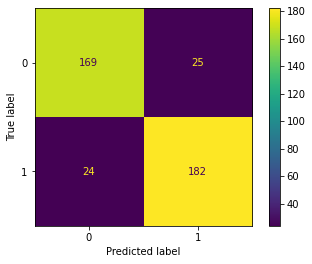

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(knn.score(densefeatures_test,np.argmax(y_test,axis=1)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = knn.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))

cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

0.88
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       194
           1       0.87      0.90      0.89       206

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


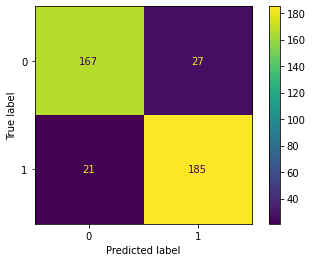

In [ ]:
from sklearn.naive_bayes import ComplementNB
gnb = ComplementNB(alpha=0)
gnb.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(gnb.score(densefeatures_test,np.argmax(y_test,axis=1)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = gnb.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))

cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

0.8675
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       194
           1       0.90      0.83      0.87       206

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



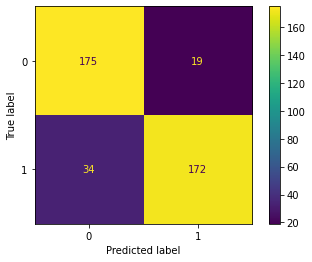

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
svm.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(svm.score(densefeatures_test,np.argmax(y_test,axis=1)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = svm.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))
cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

0.8675
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       194
           1       0.88      0.85      0.87       206

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



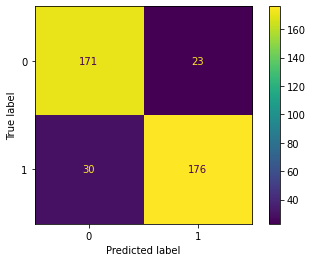

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.01,max_depth=18, random_state=42)
clf = clf.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(clf.score(densefeatures_test,np.argmax(y_test,axis=1)))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = clf.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))
cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
dense_l = Model(inputs=model.input,outputs=model.get_layer('flatten').output)

densefeatures_train = dense_l.predict(X_train)
print(densefeatures_train.shape)

densefeatures_test = dense_l.predict(X_test)
print(densefeatures_test.shape)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( criterion='gini',verbose=10,max_features='sqrt',n_jobs=4)
clf = clf.fit(densefeatures_train,np.argmax(y_train,axis=1))

(3595, 256)
(400, 256)
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100
building tree 11 of 100building tree 12 of 100




[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s


building tree 13 of 100building tree 14 of 100

building tree 15 of 100
building tree 16 of 100
building tree 17 of 100building tree 18 of 100
building tree 19 of 100

building tree 20 of 100building tree 21 of 100building tree 22 of 100


building tree 23 of 100
building tree 24 of 100building tree 25 of 100

building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100building tree 30 of 100

building tree 31 of 100
building tree 32 of 100building tree 33 of 100
building tree 34 of 100
building tree 35 of 100

building tree 36 of 100building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100building tree 46 of 100
building tree 47 of 100

building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100building tree 54 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s




building tree 62 of 100building tree 63 of 100

building tree 64 of 100
building tree 65 of 100
building tree 66 of 100building tree 67 of 100

building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100building tree 72 of 100

building tree 73 of 100
building tree 74 of 100building tree 75 of 100
building tree 76 of 100

building tree 77 of 100building tree 78 of 100

building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100building tree 86 of 100

building tree 87 of 100building tree 88 of 100building tree 89 of 100


building tree 90 of 100
building tree 91 of 100building tree 92 of 100building tree 93 of 100
building tree 94 of 100


building tree 95 of 100
building tree 96 of 100building tree 97 of 100

building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


In [ ]:
import joblib
filename = 'rf_sav.sav'
joblib.dump(clf, filename)

import joblib
filename = 'rf_sav.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(densefeatures_test,np.argmax(y_test,axis=1))
print('\n', 'Test accuracy:', result)


 Test accuracy: 0.885


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.87      0.90      0.88       194
           1       0.90      0.87      0.89       206

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



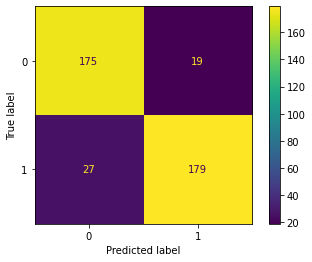

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = loaded_model.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))

cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()